<div class="text_cell_render border-box-sizing rendered_html">
<h1>Course Recommendation System using Udemy Dataset<a class="anchor-link" href="#Course-Recommendation-System-using-Udemy-Dataset">¶</a>
</h1>
<h3>Algorithm</h3>
<ul>
<li>Cosine Similarity</li>
<li>Linear Similarity</li>
</ul>
<h3>Workflow</h3>
<ul>
<li>Dataset</li>
<li>EDA</li>
<li>Vectorized our dataset</li>
<li>Cosine Similarity Matrix</li>
<li>ID, Score</li>
<li>Recommend</li>
</ul>

</div>

In [1]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [3]:
df = pd.read_csv('/content/udemy_courses_dataset.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [4]:
# list all the methods present in the neattext function

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [5]:
df['course_title'].iloc[1:5]

1    Complete GST Course & Certification - Grow You...
2    Financial Modeling for Business Analysts and C...
3    Beginner to Pro - Financial Analysis in Excel ...
4         How To Maximize Your Profits Trading Options
Name: course_title, dtype: object

### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

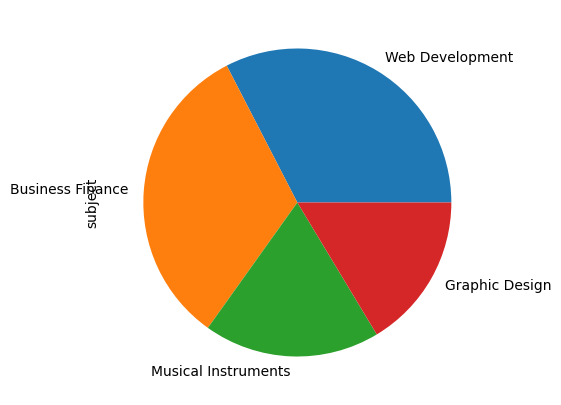

In [14]:
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

Text(0, 0.5, 'Count of Levels')

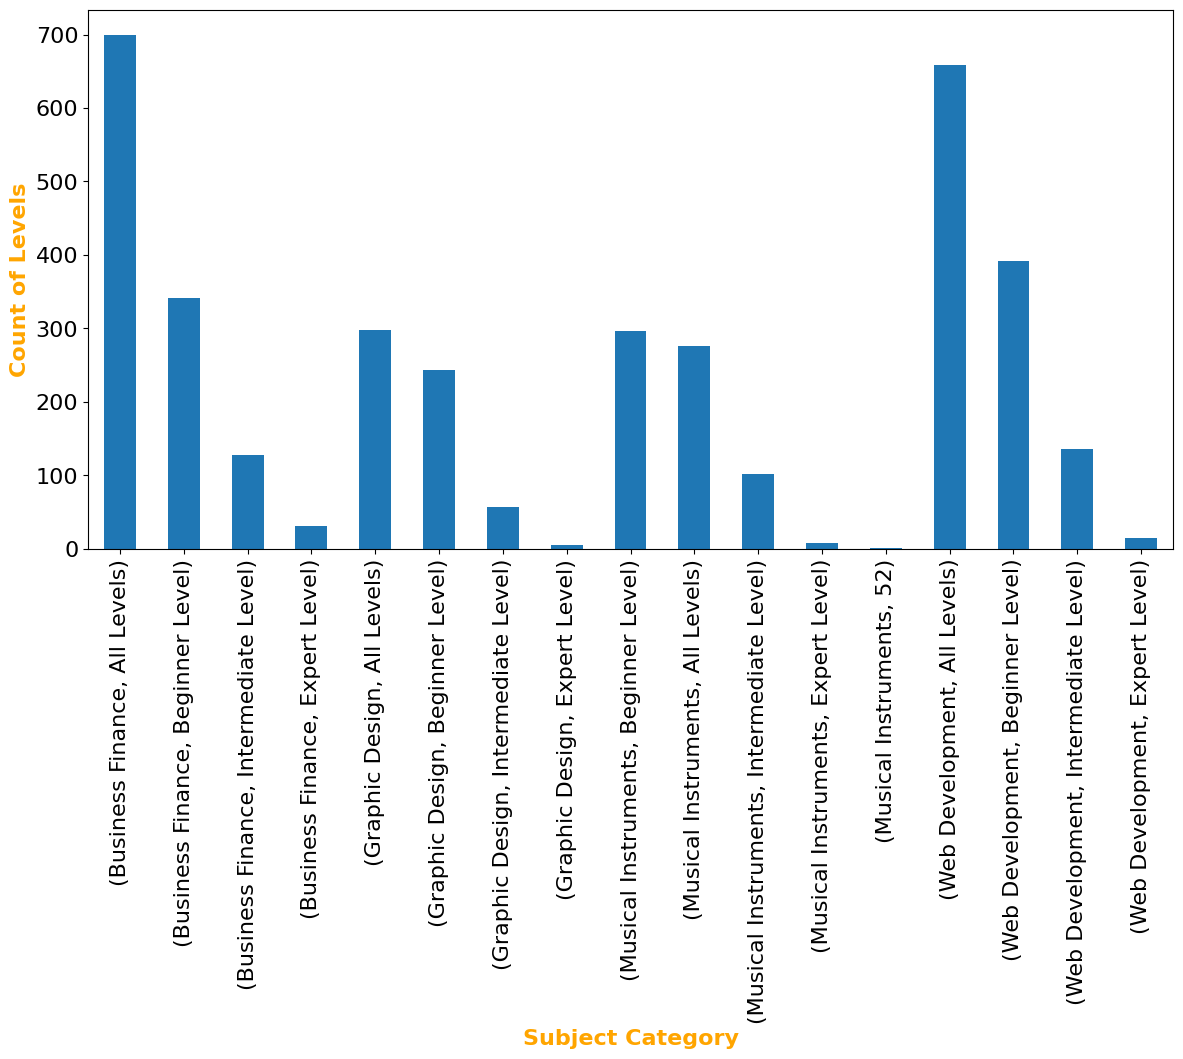

In [25]:
# Plot of How many levels per subject category

plt.figure(figsize=(14,7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Subject Category',fontsize = 16,fontweight = 'bold',color = 'orange')
plt.ylabel('Count of Levels',fontsize = 16,fontweight = 'bold',color = 'orange')

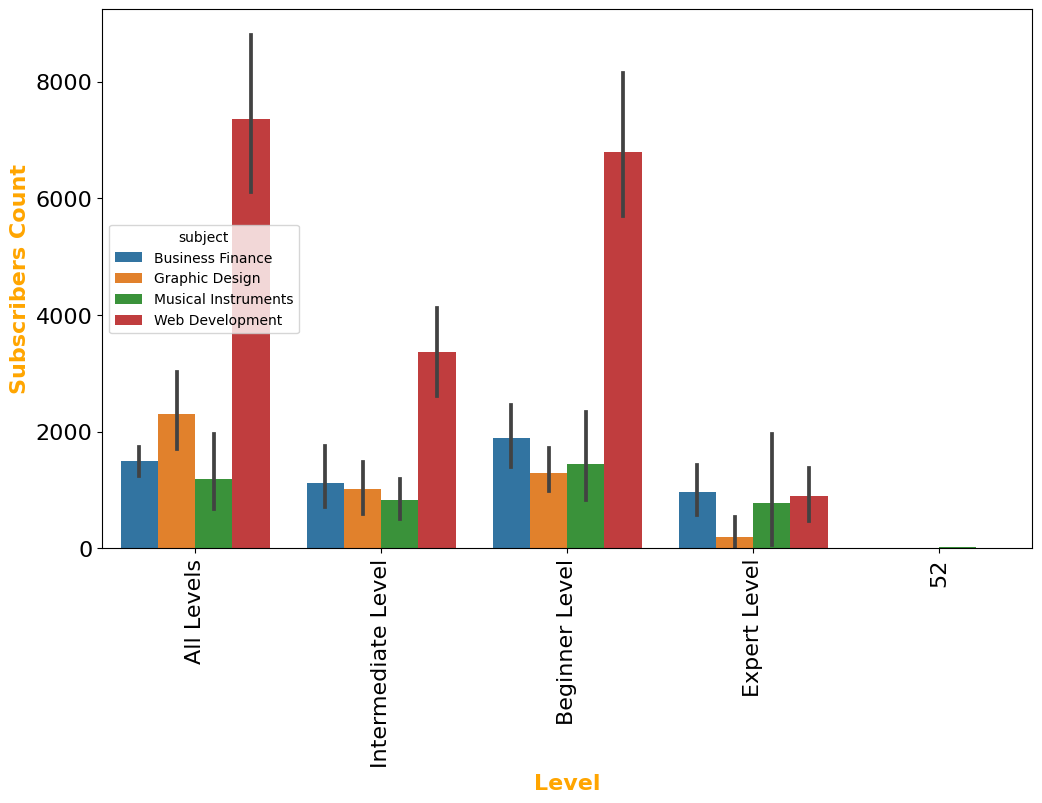

In [24]:
# number of levels and subscribers count

plt.figure(figsize=(12,7))
sn.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Level',fontsize = 16,fontweight = 'bold',
           color = 'orange')
plt.ylabel('Subscribers Count',fontsize = 16,fontweight = 'bold',
           color = 'orange')
plt.xticks(rotation = 'vertical')
plt.show()

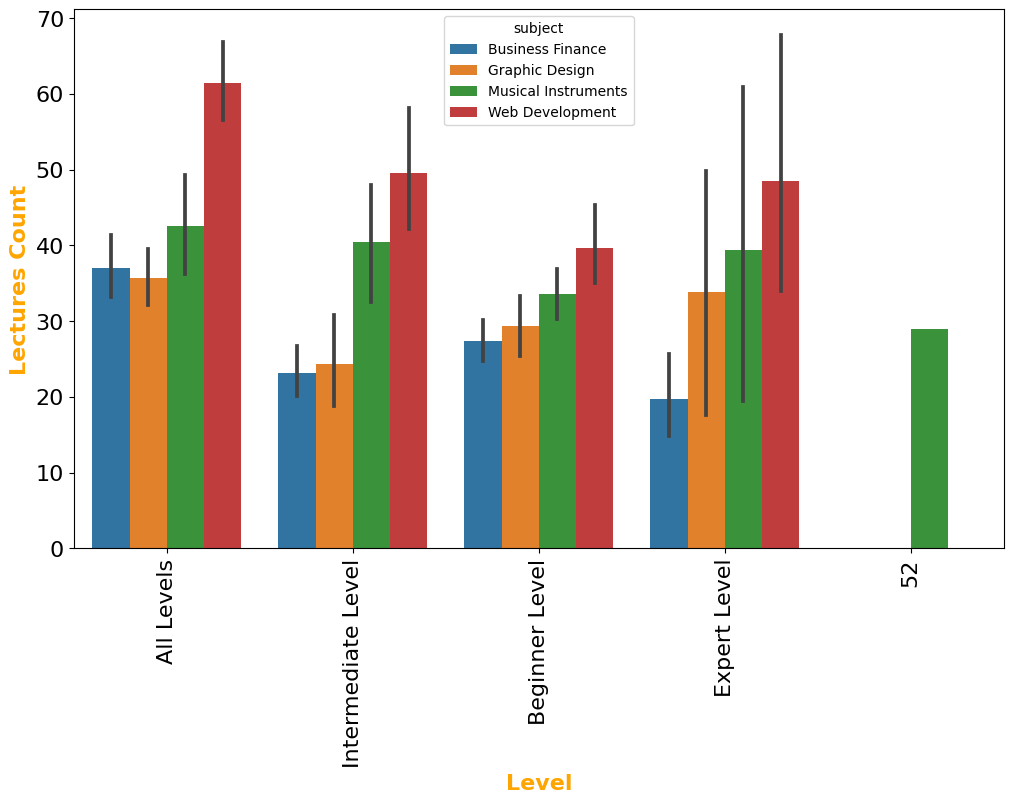

In [26]:
# number of levels and subscribers count

plt.figure(figsize=(12,7))
sn.barplot(x='level',y='num_lectures', hue='subject',data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Level',fontsize = 16,fontweight = 'bold',
           color = 'orange')
plt.ylabel('Lectures Count',fontsize = 16,fontweight = 'bold',
           color = 'orange')
plt.xticks(rotation = 'vertical')
plt.show()

In [27]:
# What is the most profitable course
# price * num_subscriber

df['profit'] = df['price'] * df['num_subscribers']
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [28]:
# The most profitable course
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,24316800,2015-11-02,21:13:27Z,2015,11,2


In [29]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                          24316800
published_date                                     

In [30]:
# The least profitable course,these may be free course
df[df['profit']==df['profit'].min()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,False,0,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0,2017-03-23,22:19:57Z,2017,3,23
105,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,False,0,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance,0,2013-12-25,19:53:34Z,2013,12,25
108,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,False,0,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance,0,2014-08-29,20:10:38Z,2014,8,29
110,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,False,0,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance,0,2016-08-05,17:03:15Z,2016,8,5
114,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,False,0,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance,0,2014-03-31,21:35:06Z,2014,3,31
121,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,False,0,29167,1463,8,Intermediate Level,1.5 hours,2014-05-27T16:22:16Z,Business Finance,0,2014-05-27,16:22:16Z,2014,5,27
130,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,False,0,11724,649,17,Beginner Level,1.5 hours,2016-03-04T05:58:09Z,Business Finance,0,2016-03-04,05:58:09Z,2016,3,4
145,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,False,0,56659,4397,16,Beginner Level,1.5 hours,2013-04-07T21:39:25Z,Business Finance,0,2013-04-07,21:39:25Z,2013,4,7
181,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,False,0,3775,138,11,Beginner Level,2 hours,2017-05-01T21:18:54Z,Business Finance,0,2017-05-01,21:18:54Z,2017,5,1
195,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,False,0,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0,2016-08-18,21:57:04Z,2016,8,18


In [31]:
# Average profitable course
df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13
5,192870,Trading Penny Stocks: A Guide for All Levels In 2017,https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/,True,150,9221,138,25,All Levels,3 hours,2014-05-02T15:13:30Z,Business Finance,1383150,2014-05-02,15:13:30Z,2014,5,2
7,403100,"Trading Stock Chart Patterns For Immediate, Explosive Gains",https://www.udemy.com/trading-chart-patterns-for-immediate-explosive-gains/,True,95,2917,148,23,All Levels,2.5 hours,2015-01-30T22:13:03Z,Business Finance,277115,2015-01-30,22:13:03Z,2015,1,30
8,476268,Options Trading 3 : Advanced Stock Profit and Success Method,https://www.udemy.com/day-trading-stock-options-3/,True,195,5172,34,38,Expert Level,2.5 hours,2015-05-28T00:14:03Z,Business Finance,1008540,2015-05-28,00:14:03Z,2015,5,28
10,592338,Forex Trading Secrets of the Pros With Amazon's AWS,https://www.udemy.com/trading-with-amazons-aws-servers-trade-secrets-of-the-pros/,True,200,4284,93,76,All Levels,5 hours,2015-09-11T16:47:02Z,Business Finance,856800,2015-09-11,16:47:02Z,2015,9,11
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-money-flow/,True,200,1380,42,17,All Levels,1 hour,2016-10-18T22:52:31Z,Business Finance,276000,2016-10-18,22:52:31Z,2016,10,18
13,794151,Forex Trading Course: Work Smarter Not Harder Proven Results,https://www.udemy.com/the-complete-trading-course/,True,195,4061,52,16,All Levels,2 hours,2016-03-16T15:40:19Z,Business Finance,791895,2016-03-16,15:40:19Z,2016,3,16
17,564966,The Complete Chart Pattern Trading Course: A Proven Approach,https://www.udemy.com/make-money-trading-stocks-from-home/,True,200,2666,115,52,All Levels,4 hours,2015-08-10T21:07:35Z,Business Finance,533200,2015-08-10,21:07:35Z,2015,8,10
18,606928,7 Deadly Mistakes of Investing that Will Slash Your Profits!,https://www.udemy.com/7-deadly-mistakes-of-investing/,True,50,5354,24,23,All Levels,1.5 hours,2015-09-21T18:10:34Z,Business Finance,267700,2015-09-21,18:10:34Z,2015,9,21



### Generating clean text by removing the stopwords and special characters

In [32]:
df['Clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)

In [33]:
df['Clean_title'].iloc[1:5]

1    Complete GST Course  Certification  Grow Practice
2     Financial Modeling Business Analysts Consultants
3          Beginner Pro  Financial Analysis Excel 2017
4                     Maximize Profits Trading Options
Name: Clean_title, dtype: object

In [34]:
# check new column Clean_title
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,Clean_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9,Complete GST Course Certification Grow Practice
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30,Beginner Pro Financial Analysis Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13,Maximize Profits Trading Options


In [36]:
# vectorizing the course_title

countvect = CountVectorizer()
cv_mat = countvect.fit_transform(df['Clean_title'])
cv_mat

<3683x3564 sparse matrix of type '<class 'numpy.int64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [37]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [39]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=countvect.get_feature_names_out())
df_cv_words

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# cosine similarity matrix

cosine_sim_mat = cosine_similarity(cv_mat)
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [41]:
# drop duplicates

course_index = pd.Series(df.index,index = df['course_title']).drop_duplicates()

In [42]:
course_index

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [43]:
temp = df[df['course_title'].str.contains('Python')]
temp.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,Clean_title
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7 hours,2017-04-28T16:41:44Z,Business Finance,58800,2017-04-28,16:41:44Z,2017,4,28,Python Algo Trading Sentiment Trading News
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5 hours,2017-05-28T23:41:03Z,Business Finance,110675,2017-05-28,23:41:03Z,2017,5,28,Python Algo Stock Trading Automate Trading
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5 hours,2017-03-30T22:17:09Z,Business Finance,743145,2017-03-30,22:17:09Z,2017,3,30,Python Finance Investment Fundamentals Data A...
149,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3 hours,2017-03-14T00:39:45Z,Business Finance,90600,2017-03-14,00:39:45Z,2017,3,14,Python Algo Trading FX Trading Oanda
336,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8 hours,2016-04-12T00:40:03Z,Business Finance,20450,2016-04-12,00:40:03Z,2016,4,12,Stock Technical Analysis Python


In [44]:
top6 = temp.sort_values(by = 'num_subscribers',ascending=False).head(6)
top6

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,Clean_title
2502,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4 hours,2012-04-25T00:01:43Z,Web Development,1763350,2012-04-25,00:01:43Z,2012,4,25,Web Programming Python
2575,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development,4565340,2013-04-08,00:46:14Z,2013,4,8,Coding Entrepreneurs Learn Python Django More
2533,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09T15:37:56Z,Web Development,1239980,2015-02-09,15:37:56Z,2015,2,9,Learn Python Django Payment Processing
3205,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5 hours,2017-02-24T18:40:55Z,Web Development,2366400,2017-02-24,18:40:55Z,2017,2,24,Python Django Stack Web Developer Bootcamp
3512,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development,0,2015-06-09,19:51:50Z,2015,6,9,Fun creative web engineering Python Web2py
2558,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11 hours,2016-09-26T15:08:29Z,Web Development,1526265,2016-09-26,15:08:29Z,2016,9,26,Complete Ethical Hacking Course 20 Python Kal...


Test keyword

In [69]:
index = course_index['How To Maximize Your Profits Trading Options'] # example selected course

In [46]:
scores = list(enumerate(cosine_sim_mat[index]))

In [ ]:
sorted_score = sorted(scores,key = lambda x:x[1],reverse=True)
sorted_score

In [ ]:
# so the sorted score list is a collection of tuples
# which have the index and the value,so i will select the indices first

sorted_indices = [i[0] for i in sorted_score[1:]]

sorted_values = [i[1] for i in sorted_score[1:]]

sorted_values

In [50]:
recommended_result_df = df.iloc[sorted_indices]

recommended_result_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,Clean_title
410,889066,Trading Options Basics,https://www.udemy.com/trading-options-basics/,True,200,8,0,8,Beginner Level,1.5 hours,2016-07-01T03:13:22Z,Business Finance,1600,2016-07-01,03:13:22Z,2016,7,1,Trading Options Basics
43,627540,Options Trading - How to Win with Weekly Options,https://www.udemy.com/work-from-home-setup-you...,True,115,7489,1190,25,Intermediate Level,1 hour,2015-10-22T21:54:28Z,Business Finance,861235,2015-10-22,21:54:28Z,2015,10,22,Options Trading Win Weekly Options
96,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,True,40,2000,30,9,All Levels,1 hour,2015-04-13T20:28:04Z,Business Finance,80000,2015-04-13,20:28:04Z,2015,4,13,Intermediate Options trading concepts Stocks O...
138,1243448,Forex Trading with Fixed 'Risk through Options...,https://www.udemy.com/forexoptions/,True,200,611,4,26,Beginner Level,1 hour,2017-06-07T17:15:07Z,Business Finance,122200,2017-06-07,17:15:07Z,2017,6,7,Forex Trading Fixed Risk Options Trading
195,919906,Trading Options For Consistent Returns: Option...,https://www.udemy.com/trading-options-for-income/,False,0,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0,2016-08-18,21:57:04Z,2016,8,18,Trading Options Consistent Returns Options Basics


In [51]:
recommended_result_df['Similarity_Score'] = np.array(sorted_values)

recommended_result_df.head()

<ipython-input-51-0a09ec1baf9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_result_df['Similarity_Score'] = np.array(sorted_values)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,Clean_title,Similarity_Score
410,889066,Trading Options Basics,https://www.udemy.com/trading-options-basics/,True,200,8,0,8,Beginner Level,1.5 hours,2016-07-01T03:13:22Z,Business Finance,1600,2016-07-01,03:13:22Z,2016,7,1,Trading Options Basics,0.577350
43,627540,Options Trading - How to Win with Weekly Options,https://www.udemy.com/work-from-home-setup-you...,True,115,7489,1190,25,Intermediate Level,1 hour,2015-10-22T21:54:28Z,Business Finance,861235,2015-10-22,21:54:28Z,2015,10,22,Options Trading Win Weekly Options,0.566947
96,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,True,40,2000,30,9,All Levels,1 hour,2015-04-13T20:28:04Z,Business Finance,80000,2015-04-13,20:28:04Z,2015,4,13,Intermediate Options trading concepts Stocks O...,0.530330
138,1243448,Forex Trading with Fixed 'Risk through Options...,https://www.udemy.com/forexoptions/,True,200,611,4,26,Beginner Level,1 hour,2017-06-07T17:15:07Z,Business Finance,122200,2017-06-07,17:15:07Z,2017,6,7,Forex Trading Fixed Risk Options Trading,0.530330
195,919906,Trading Options For Consistent Returns: Option...,https://www.udemy.com/trading-options-for-income/,False,0,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0,2016-08-18,21:57:04Z,2016,8,18,Trading Options Consistent Returns Options Basics,0.530330


In [52]:
use_df = recommended_result_df[['Clean_title','Similarity_Score']]
use_df

,Clean_title,Similarity_Score
410,Trading Options Basics,0.577350
43,Options Trading Win Weekly Options,0.566947
96,Intermediate Options trading concepts Stocks O...,0.530330
138,Forex Trading Fixed Risk Options Trading,0.530330
195,Trading Options Consistent Returns Options Basics,0.530330
...,...,...
3678,Learn jQuery Scratch Master JavaScript library,0.000000
3679,Design WordPress Website Coding,0.000000
3680,Learn Build Polymer,0.000000
3681,CSS Animations Create Amazing Effects Website,0.000000


In [70]:
def recommend_course(keyword, numrec):

    course_index = pd.Series(
        df.index, index=df['course_title']).drop_duplicates()

    index = course_index[keyword]

    scores = list(enumerate(cosine_sim_mat [index]))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    selected_course_index = [i[0] for i in sorted_scores[1:]]

    selected_course_score = [i[1] for i in sorted_scores[1:]]

    rec_df = df.iloc[selected_course_index]

    rec_df['Similarity_Score'] = selected_course_score

    final_recommended_courses = rec_df[[
        'course_title', 'Similarity_Score', 'url', 'price', 'num_subscribers']]

    return final_recommended_courses.head(numrec)

In [71]:
ans = recommend_course('Web Programming with Python', 20) # selected couse : Web Programming with Python
ans

<ipython-input-70-dd0e18ec4daa>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['Similarity_Score'] = selected_course_score


,course_title,Similarity_Score,url,price,num_subscribers
3348,Python Web Programming,1.000000,https://www.udemy.com/python-web-programming/,100,1020
3143,Complete Python Web Course: Build 8 Python Web...,0.666667,https://www.udemy.com/the-complete-python-web-...,110,7489
2686,Python for Beginners: Python Programming Langu...,0.612372,https://www.udemy.com/python-course/,150,6153
3338,Introduction to QGIS Python Programming,0.577350,https://www.udemy.com/introduction-to-qgis-pyt...,85,197
2712,Back to School Web Development and Programming...,0.516398,https://www.udemy.com/back-to-school-web-devel...,200,18170
2864,Introduction to web programming for GIS applic...,0.516398,https://www.udemy.com/introduction-to-web-prog...,100,205
3165,Professional Python Web Development Using Flask,0.516398,https://www.udemy.com/python-flask-course/,120,3420
3244,Web Programming Course : Asp.Net MVC,0.516398,https://www.udemy.com/mvc-course/,100,2760
2512,Web Development w/ Google’s Go (golang) Progra...,0.471405,https://www.udemy.com/go-programming-language/,65,4872
2857,The Complete TypeScript Programming Guide for ...,0.471405,https://www.udemy.com/typescript-programming/,40,236


In [72]:
ans.shape

(20, 5)